# PMR3409 - Controle II - 2025
# Lab 4 Motor CC: Controle de posição e velocidade

# Identificação

**Aluno 1 : Giovanni Cangiano**           **NUSP:10705892**

**Aluno 2 : Edilson Elias Barbosa Guedes Dias**           **NUSP:13726042** 

**Turma de Laboratório: 3**

**Professor: Oswaldo Horikawa**

**OBS: Você deve submeter o seu relatório em um arquivo compactado contendo os seguintes arquivos:**

- Arquivo *.ipynb.
- Diretório contendo todas as figuras do seu relatório.
- **Arquivo *.html equivalente ao seu arquivo *.ipynb. Menu: File -> Download as -> HTML**

# 1. Introdução

Nesse laboratório você deve realizar dois projetos de sistemas de controle para o kit de motor CC através do método indireto, i.e., o projeto deve ser feito no domínio do tempo contínuo  e depois o controlador deve ser discretizado através do método de transformação Bilinear.

Para o controle de velocidade angular deve ser projetado um controlador PI através do método do lugar das raízes e para o controle de posição deve ser projetado um controlador P.

# 2. Controle de velocidade angular de um motor CC utilizando controlador PI - Método indireto

## 2.1 Projeto e simulação

Nessa seção você deve projetar um controlador PI para o controle de velocidade de um motor CC
utilizando o método do Lugar das Raízes.
Posteriormente o controlador deve ser discretizado utilizando o método de Transformação Bilinear.

A função de transferência no domínio $s$ é dada por:
$$
\frac{\Omega(s)}{U(s)} = G_\omega(s) = \frac{K_\omega}{\tau s+1}
$$
Os seguintes valores dos parâmetros devem ser adotados:
$$
k_\omega = 1.0,
$$
$$
T = 0.25.
$$
Utilizar intervalo de amostragem $h=0.05s$.

Os requisitos do projeto são apresentados a seguir:
1. Especificação da característica estática:
  - Erro de regime estacionário nulo para uma entrada degrau unitário: $\lim_{k\to\infty}e(k) = 0$
2. Especificação das características transitórias para degrau unitário:
  - Tempo de subida: $t_r < 0.5s$ 
  - Tempo de assentamento: $t_s < 1.0s$
  - Máximo sobressinal: $M_p < 10\%$
  
**Utilize a técnica do Lugar das Raízes no domínio $s$ (Veja a célula abaixo).**

C:\Users\Giovanni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


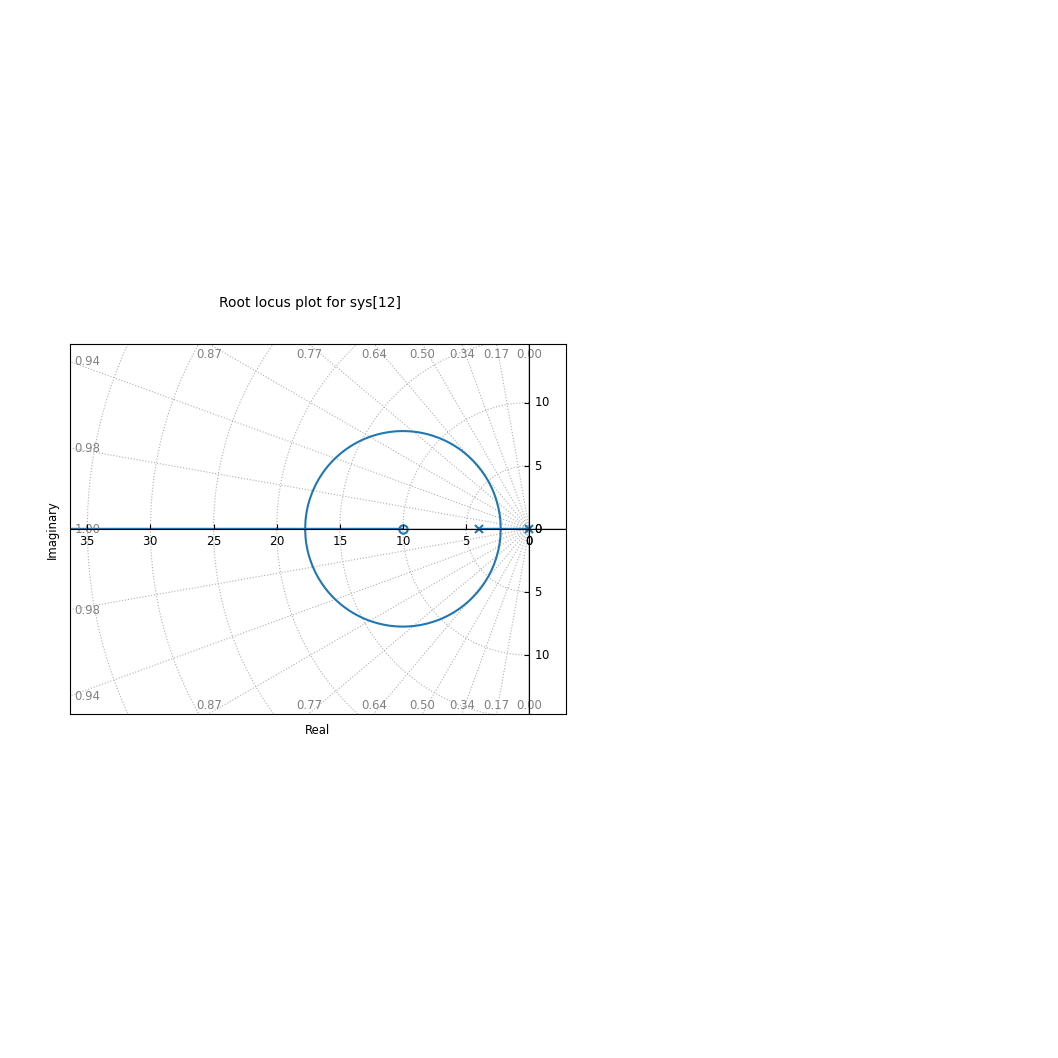

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as co
plt.close('all')
%matplotlib inline
#%matplotlib qt
s=co.tf('s')
#
# Velocidade do motor CC
# Gw = Kw/(Ts+1)
#
Kw = 1.0
T  = 0.25
Gw = Kw/(T*s+1)
#
# Controlador PI
# H(s) = Kp(1 + 1/Tis)
# Escolha do Kp feito atraves do LR
#
Ti = 0.1
H  = (1+1/(Ti*s))
openloop=Gw*H
[rlist,klist]=co.rlocus(openloop,grid=True)

a-) Indique abaixo as constantes escolhidas para o seu controlador:

|Parâmetro|Valor|
|:-|:-|
|$K_p$|0.85|
|$T_i$|0.1|

b-) Indique abaixo a função de transferência do controlador PI no domínio
    do tempo discreto:
    
**Resposta:**

$$
H_d(z)=\frac{0.2125z-0.1275}{0.2z-0.2}
$$
    
c-) Indique abaixo a função de transferência de velocidade do motor CC
    no domínio do tempo discreto:

**Resposta:**

$$
G_{\omega z}(z)=\frac{0.03852z-0.02311}{0.2z^2-0.3252z+0.1406}
$$

d-) Pólos e zeros em malha fechada no domínio contínuo e discreto:

||pólo 1|pólo 2|zero|
|:-|:-|:-|:-|
|contínuo|-3.7+4.5j|-3.7-4.5j|-10|
|discreto|0.813+0.205j|0.813-0.205j|0.6|

e-) Caracterização da resposta a degrau unitário nos domínios do tempo contínuo e discreto:

||$tr$|$ts$|$Mp$|$\omega_{ss}$|
|:-|:-|:-|:-|:-|
|contínuo|0.26|0.92|9.773|1|
|discreto|0.25|0.9|13.77|1|

f-) Gráfico da resposta a degrau unitário do sistema de controle em malha fechada nos domínio do tempo contínuo e discreto.

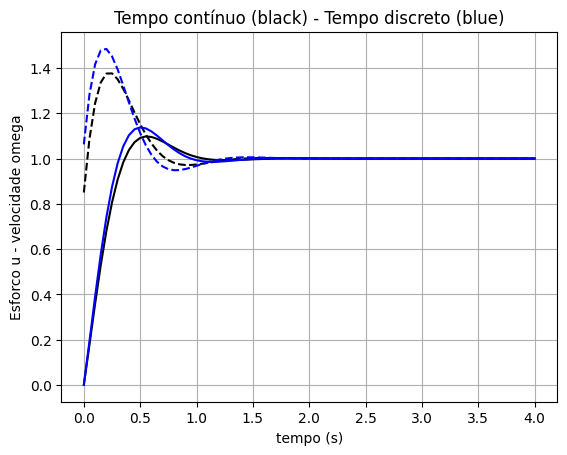

g-) Analise os resultados:

Nota-se que a conversão do sitema de contínuo para discreto via o método do ZOH (Zero order Hold) leva a uma resposta muito parecida para os dois sistemas para a discretização de h=0.05 escolhida.
Entretanto, na simulação é gerado um pequeno atraso na resposta do sistema discreto da ordem de 0.05/2, além de um aumento do sobressinal em comparação ao sistema contínuo, o que indica que a
discretização deixa o sistema mais reativo a entrada degrau.

--------------------------------
planta do sistema no dominio s
--------------------------------
Gw(s) =  <TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    1
----------
0.25 s + 1

--------------------------------
Controlador PI
--------------------------------
H(s) =  <TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.085 s + 0.85
--------------
    0.1 s

H(s) Polos =  [0.+0.j]
H(s) Zeros =  [-10.+0.j]

Caracteristicas da malha fechada---------->

cloop = <TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      0.085 s + 0.85
--------------------------
0.025 s^2 + 0.185 s + 0.85

cloop Polos = [-3.7+4.50666174j -3.7-4.50666174j]
cloop Zeros = [-10.+0.j]
-------------
CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop
tempo de subida tr =  0.26 seg
tempo de acomodacao ts =  0.92 seg
maximo sobresinal Mp =  9.77276903801183
valor de pico y =  1.10
instante de pico tp =  0.57 seg
valor de regime estacionario o

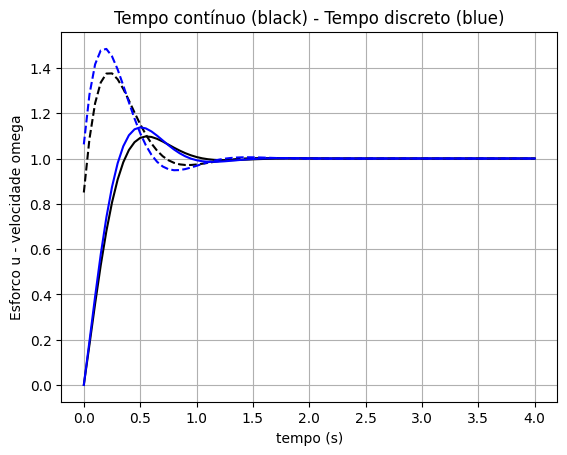

In [1]:
import numpy as np
import control as co_general
import matplotlib.pyplot as plt
import control.matlab as co
#plt.close('all')
# Escolher essa opcao para o plot em janela fora do notebook
#%matplotlib qt
# Opcao para plot interativo dentro do notebook (mais dificil controlar o zoom)
#%matplotlib notebook 
# plot inline
%matplotlib inline
#
# Definicao do intervalo de amostragem h
#
h = 0.05
#
# Velocidade do motor CC
# Gw = Kw/(Ts+1)
#
s = co.tf('s')
print('--------------------------------')
print('planta do sistema no dominio s')
print('--------------------------------')
Kw = 1.0
TAU  = 0.25
Gw = Kw/(TAU*s+1)
print('Gw(s) = ',Gw)
#
# Controlador PI 
#                     1
#   H(s) = Kp*( 1 + ----- )    
#                    Ti*s
Kp = 0.85
Ti = 0.1
H = Kp*(1+1/(Ti*s))
print('--------------------------------')
print('Controlador PI')
print('--------------------------------')
print('H(s) = ',H)
print('H(s) Polos = ',co.pole(H))
print('H(s) Zeros = ',co.zero(H))
# malha fechada
cloop = co.feedback(Gw*H,1)
print('\nCaracteristicas da malha fechada---------->\n')
print('cloop =',cloop)
print('cloop Polos =',co.pole(cloop))
print('cloop Zeros =',co.zero(cloop))
cloopU = co.feedback(H,Gw)      # <--- FT do esforco de controle u
#
# Definicao do vetor de tempo com espacamento
# igual ao intervalo de amostragem h
# Esse vetor também é utilizado para o domínio continuo
#
Duration = 4
npoints = int(Duration/h)+1
t = np.linspace(0,Duration,npoints)
#
# Resposta a degrau unitario domínio s, tempo continuo
#
omega,t = co.step(cloop,t)
co.stepinfo(cloop)
u,t = co.step(cloopU,t)       # esforco de controle u
sinfo = co.stepinfo(cloop)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop')
print('tempo de subida tr = ','%.2f' % sinfo['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % sinfo['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',sinfo['Overshoot'])
print('valor de pico y = ','%.2f' % sinfo['Peak'])
print('instante de pico tp = ','%.2f' % sinfo['PeakTime'],'seg')
print('valor de regime estacionario omegass = ','%.2f' % sinfo['SteadyStateValue'])
#
# Dominio do tempo discreto
#
print('--------------------------------')
print('planta do sistema no dominio z')
print('discretizacao com zoh')
print('--------------------------------')
Gwz = co.c2d(Gw,h,'zoh')
print('Gwz(z) = ',Gwz)
#
# Discretizacao do controlador PI
print('----------------------------------------------\n')
print('Controlador PI em tempo discreto')
print('\n----------------------------------------------')
#
# H(s) = Kp (1 + 1/Ti*s)
# o controlador em tempo dsicreto pelo Metodo Tustin ou
# Transformacao Bilinear e' obtido fazendo:
#   s =  2   (z-1)
#       --- -------
#        h   (z+1)
# Definicao do controlador PI em tempo discreto
#
# Hd(z) = (h*Kp + 2*Ti*Kp )z (h*Kp - 2*Ti*Kp)
#         -----------------------------------
#                    2*Ti*z - 2*Ti
#
Hd = co.tf([h*Kp+2*Ti*Kp, h*Kp-2*Ti*Kp],[2*Ti,-2*Ti],h)
#Hd=co.c2d(H,h,method='bilinear')
#print('------------------------------------')
print('Funcao de transferencia do controlador')
print('Hd = ',Hd)
#
# Malha feachada
#
cloopHDiscreto = co.feedback(Gwz*Hd,1)
cloopUDiscreto = co.feedback(Hd,Gwz)
# Malha fechada
print('\nCaracteristicas da malha fechada---------->\n')
print('cloopHDiscreto(z) =',cloopHDiscreto)
print('cloopHDiscreto(z) Polos =',co.pole(cloopHDiscreto))
print('cloopHDiscreto(z) Zeros =',co.zero(cloopHDiscreto))
#
# Calculo da resposta a degrau unitario
# tempo discreto
#
omegad,t = co.step(cloopHDiscreto,t)
ud,t = co.step(cloopUDiscreto,t)
sinfodisc = co.stepinfo(cloopHDiscreto)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop')
print('tempo de subida tr = ','%.2f' % sinfodisc['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % sinfodisc['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',sinfodisc['Overshoot'])
print('valor de pico y = ','%.2f' % sinfodisc['Peak'])
print('instante de pico tp = ','%.2f' % sinfodisc['PeakTime'],'seg')
print('valor de regime estacionario omegass = ','%.2f' % sinfodisc['SteadyStateValue'])
#
# Graficos no dominio do tempo
#
plt.plot(t,omega,'k',t,u,'k--',t,omegad,'b',t,ud,'b--')
plt.title('Tempo contínuo (black) - Tempo discreto (blue)')
plt.xlabel('tempo (s)')
plt.ylabel('Esforco u - velocidade omega')
plt.grid()

## 2.2 Ensaio experimental: controle de velocidade angular no kit de motor CC

Nessa seção você deve testar o seu projeto de controlador PI desenvolvido utilizando o script Matlab xxx.m.

**Escolher um nome de arquivo diferente para cada ensaio. A célula a seguir realiza a leitura do arquivo de dados
e gera um gráfico com os resultados experimentais.**

a-) Ensaio Ve1. 1: Motor sem acoplamento magnético, Amplitude do sinal de referência A=1.5Volts, intervalo de amostragem h=0.05 segundos


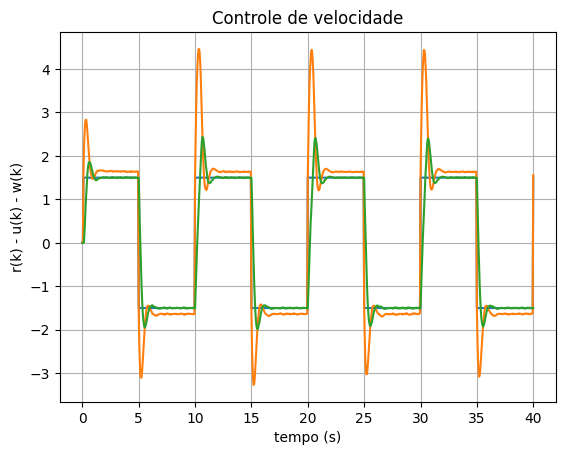


b-) Ensaio Ve1. 2: Motor sem acoplamento magnético, Amplitude do sinal de referência A=3.0Volts, intervalo de amostragem h=0.05 segundos


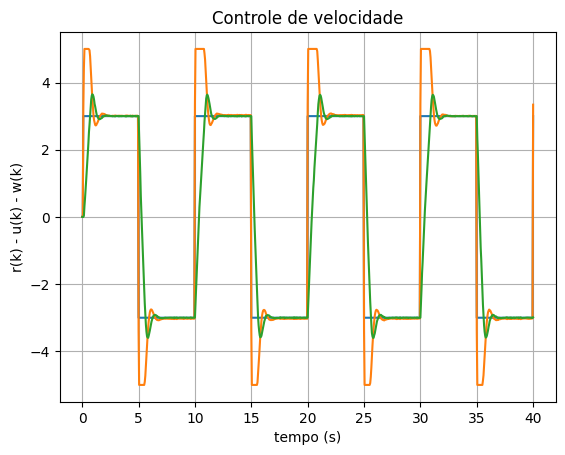


c-) Ensaio Ve1. 3: Motor com acoplamento magnético parcial, Amplitude do sinal de referência A=3.0Volts, intervalo de amostragem h=0.05 segundos


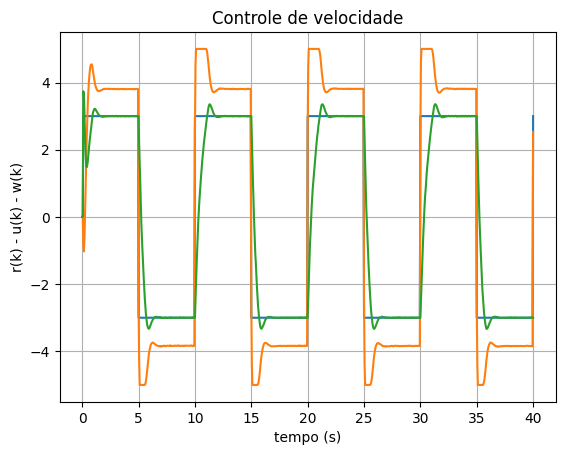


d-) Analise os resultados obtidos

**Resposta:**


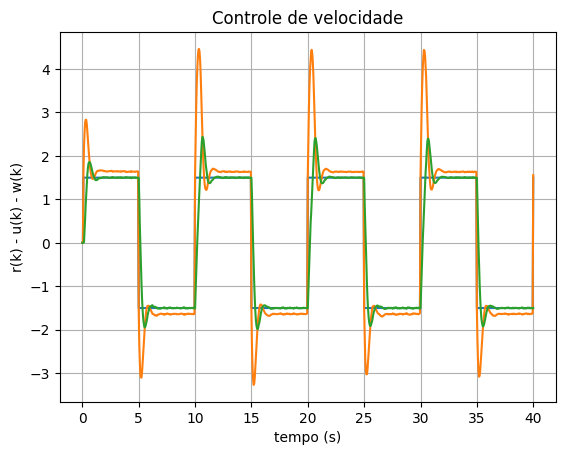

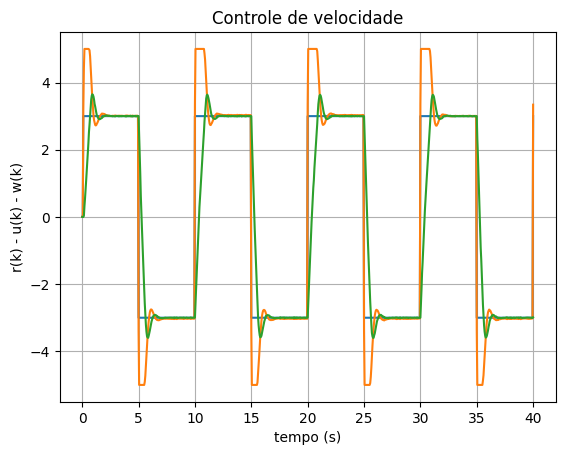

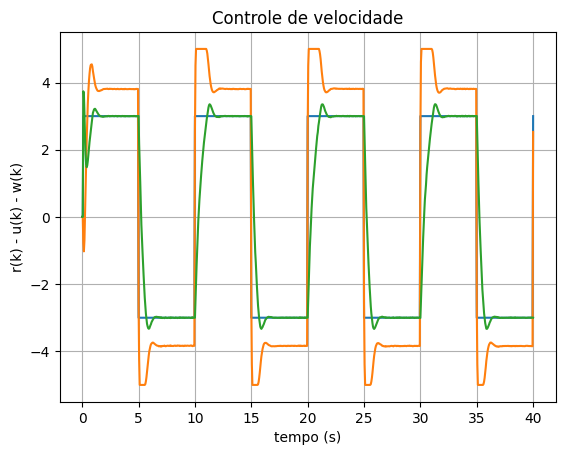

In [5]:
#%matplotlib qt
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as co
from scipy import signal
#
# Leitura do arquivo de dados gerado pelo Script Matlab
#
# coluna 1 = t (tempo em segundos)
# coluna 2 - vetorrk (sinal de referencia em volts)
# coluna 3 - vetoruk (esforco de controle em volts)
# coluna 4 - vetoryk (velocidade angular, em volts)
#
for i in range (1,4):
    a = np.loadtxt("ve"+str(i)+ ".txt", dtype=float)     # <--------- modifique aqui o nome do arquivo
    t = a[:,0];
    r = a[:,1];
    u = a[:,2];
    w = a[:,3];
    h = t[1]-t[0]; # <--------------------------------intervalo de amostragem
    #
    # Esses objetos provenientes da library numpy
    # possuem posicao de indice 0
    # u[0], w[0] existem
    #
    plt.plot(t,r,t,u,t,w)
    plt.title('Controle de velocidade')
    plt.xlabel('tempo (s)')
    plt.ylabel('r(k) - u(k) - w(k)')
    plt.grid()
    plt.show()

# 3. Controle de posição angular de um motor CC utilizando controlador P - Método indireto

## 3.1 Projeto e simulação

Nessa seção você deve projetar um controlador P para o controle de posição angular de um motor CC.


A função de transferência no domínio $s$ é dada por:
$$
\frac{\Theta(s)}{U(s)} = G_\theta(s) = \frac{K_\theta}{s(\tau s+1)}
$$
Os seguintes valores dos parâmetros devem ser adotados:
$$
k_\theta = 8.0,
$$
$$
\tau = 0.25.
$$
Utilizar intervalo de amostragem $h=0.05s$.

Os requisitos do projeto são apresentados a seguir:
1. Especificação da característica estática:
  - Erro de regime estacionário nulo para uma entrada degrau unitário: $\lim_{k\to\infty}e(k) = 0$
2. Especificação das características transitórias para degrau unitário:
  - Tempo de subida: $t_r < 0.5s$ 
  - Tempo de assentamento: $t_s < 2.0s$
  - Máximo sobressinal: $M_p < 20\%$

a-) Indique abaixo a constante escolhida para o seu controlador:

|Parâmetro|Valor|
|:-|:-|
|$K_p$|0.45|

    
c-) Indique abaixo a função de transferência da posição angular do motor CC
    no domínio do tempo discreto:

**Resposta:**

$$
G_{\theta z}(z)=\frac{0.01686z+0.01577}{z^2-1.802z+0.8345}
$$

d-) Pólos em malha fechada no domínio contínuo e discreto:

||pólo 1|pólo 2|
|:-|:-|:-|
|contínuo|-2+3.22j|-2|
|discreto|0.9+0.15j|0.9-0.15j|

e-) Caracterização da resposta a degrau unitário nos domínios do tempo contínuo e discreto:

||$tr$|$ts$|$Mp$|$\omega_{ss}$|
|:-|:-|:-|:-|:-|
|contínuo|0.45|2.02|14.25|1|
|discreto|0.45|2.2|18.07|1|

f-) Gráfico da resposta a degrau unitário do sistema de controle em malha fechada nos domínio do tempo contínuo e discreto.

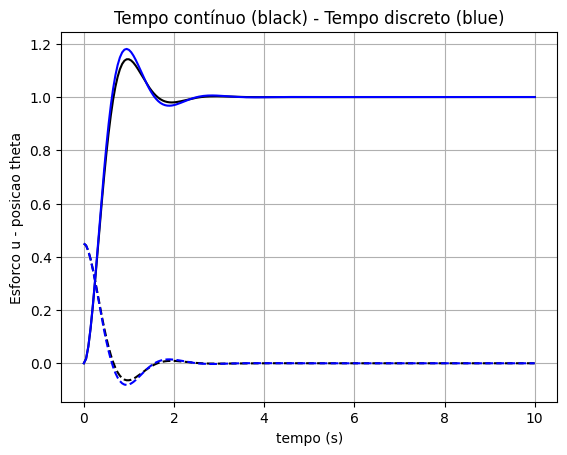

g-) Analise os resultados:

**Resposta:**

--------------------------------
planta do sistema no dominio s
--------------------------------
Gtheta(s) =  <TransferFunction>: sys[220]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     8
------------
0.25 s^2 + s

--------------------------------
Controlador P
--------------------------------
H(s) =  0.45

Caracteristicas da malha fechada---------->

cloop = <TransferFunction>: sys[224]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       3.6
------------------
0.25 s^2 + s + 3.6

cloop Polos = [-2.+3.2249031j -2.-3.2249031j]
cloop Zeros = []
-------------
CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop
tempo de subida tr =  0.45 seg
tempo de acomodacao ts =  2.02 seg
maximo sobresinal Mp =  14.25040465483869
valor de pico y =  1.14
instante de pico tp =  0.98 seg
valor de regime estacionario omegass =  1.00
--------------------------------
planta do sistema no dominio z
discretizacao com zoh
--------------------------------
Gthetaz(z) =  <TransferFunction>: sys[220]$sample

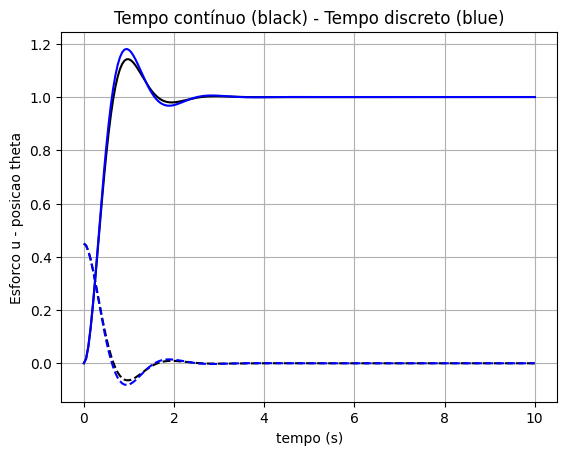

In [9]:
import numpy as np
import control as co_general
import matplotlib.pyplot as plt
import control.matlab as co
#plt.close('all')
# Escolher essa opcao para o plot em janela fora do notebook
#%matplotlib qt
# Opcao para plot interativo dentro do notebook (mais dificil controlar o zoom)
#%matplotlib notebook 
# plot inline
%matplotlib inline
#
# Definicao do intervalo de amostragem h
#
h = 0.05
#
# Posicao angular theta do motor CC
# Gtheta = Ktheta/s(Tau*s+1)
#
s = co.tf('s')
print('--------------------------------')
print('planta do sistema no dominio s')
print('--------------------------------')
Ktheta = 8.0
TAU  = 0.25
Gtheta = Ktheta/(s*(TAU*s+1))
print('Gtheta(s) = ',Gtheta)
#
# Controlador P 
#                
#   H(s) = Kp   
#                   
Kp = 0.45
H=Kp
print('--------------------------------')
print('Controlador P')
print('--------------------------------')
print('H(s) = ',H)
# malha fechada
cloop = co.feedback(Gtheta*H,1)
print('\nCaracteristicas da malha fechada---------->\n')
print('cloop =',cloop)
print('cloop Polos =',co.pole(cloop))
print('cloop Zeros =',co.zero(cloop))
cloopU = co.feedback(H,Gtheta)      # <--- FT do esforco de controle u
#
# Definicao do vetor de tempo com espacamento
# igual ao intervalo de amostragem h
# Esse vetor também é utilizado para o domínio continuo
#
Duration = 10
npoints = int(Duration/h)+1
t = np.linspace(0,Duration,npoints)
#
# Resposta a degrau unitario domínio s, tempo continuo
#
theta,t = co.step(cloop,t)
co.stepinfo(cloop)
u,t = co.step(cloopU,t)       # esforco de controle u
sinfo = co.stepinfo(cloop)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop')
print('tempo de subida tr = ','%.2f' % sinfo['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % sinfo['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',sinfo['Overshoot'])
print('valor de pico y = ','%.2f' % sinfo['Peak'])
print('instante de pico tp = ','%.2f' % sinfo['PeakTime'],'seg')
print('valor de regime estacionario omegass = ','%.2f' % sinfo['SteadyStateValue'])
#
# Dominio do tempo discreto
#
print('--------------------------------')
print('planta do sistema no dominio z')
print('discretizacao com zoh')
print('--------------------------------')
Gthetaz = co.c2d(Gtheta,h,'zoh')
print('Gthetaz(z) = ',Gthetaz)
#
# Discretizacao do controlador PI
# ObviamenteH(s) = H(z) = Kp
#
Hd = H
#print('------------------------------------')
print('Funcao de transferencia do controlador')
print('Hd = ',Hd)
#
# Malha feachada
#
cloopHDiscreto = co.feedback(Gthetaz*Hd,1)
cloopUDiscreto = co.feedback(Hd,Gthetaz)
# Malha fechada
print('\nCaracteristicas da malha fechada---------->\n')
print('cloopHDiscreto(z) =',cloopHDiscreto)
print('cloopHDiscreto(z) Polos =',co.pole(cloopHDiscreto))
print('cloopHDiscreto(z) Zeros =',co.zero(cloopHDiscreto))
#
# Calculo da resposta a degrau unitario
# tempo discreto
#
thetad,t = co.step(cloopHDiscreto,t)
ud,t = co.step(cloopUDiscreto,t)
sinfodisc = co.stepinfo(cloopHDiscreto)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop')
print('tempo de subida tr = ','%.2f' % sinfodisc['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % sinfodisc['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',sinfodisc['Overshoot'])
print('valor de pico y = ','%.2f' % sinfodisc['Peak'])
print('instante de pico tp = ','%.2f' % sinfodisc['PeakTime'],'seg')
print('valor de regime estacionario thetass = ','%.2f' % sinfodisc['SteadyStateValue'])
#
# Graficos no dominio do tempo
#
plt.plot(t,theta,'k',t,u,'k--',t,thetad,'b',t,ud,'b--')
plt.title('Tempo contínuo (black) - Tempo discreto (blue)')
plt.xlabel('tempo (s)')
plt.ylabel('Esforco u - posicao theta')
plt.grid()

## 3.2 Ensaio experimental: controle de posição angular no kit de motor CC

Nessa seção você deve testar o seu projeto de controlador proporcional desenvolvido utilizando o script Matlab xxx.m.

**Escolher um nome de arquivo diferente para cada ensaio. A célula a seguir realiza a leitura do arquivo de dados
e gera um gráfico com os resultados experimentais.**

a-) Ensaio Pos. 1: Motor sem acoplamento magnético, Amplitude do sinal de referência A=1.0Volts, intervalo de amostragem h=0.1 segundos


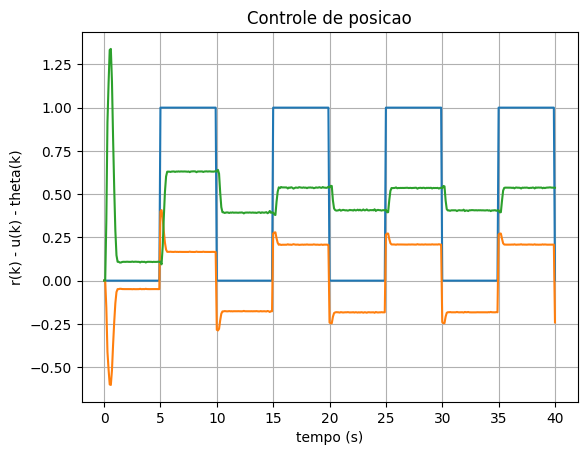


b-) Ensaio Pos. 2: Motor sem acoplamento magnético, Amplitude do sinal de referência A=2.0Volts, intervalo de amostragem h=0.1 segundos


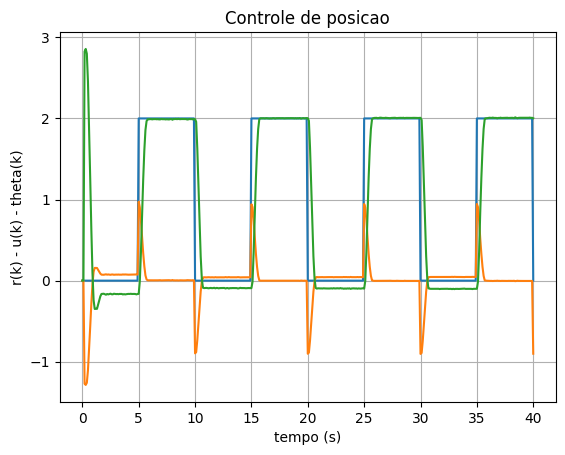


c-) Ensaio Pos. 3: Motor sem acoplamento magnético, Amplitude do sinal de referência A=3.5Volts, intervalo de amostragem h=0.1 segundos


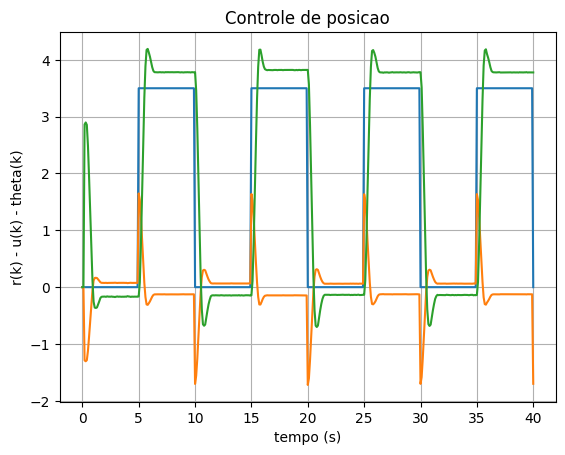


d-) Analise os resultados obtidos

**Resposta:**

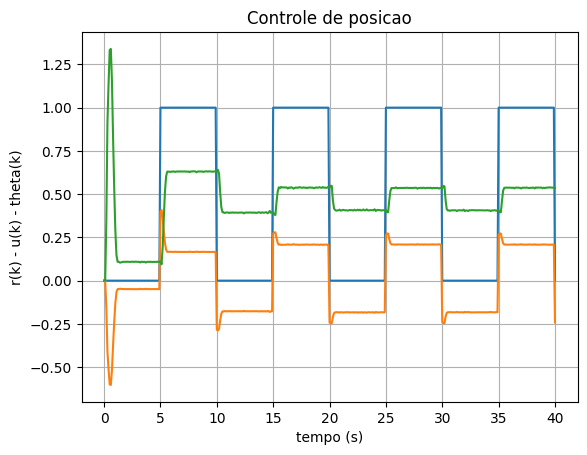

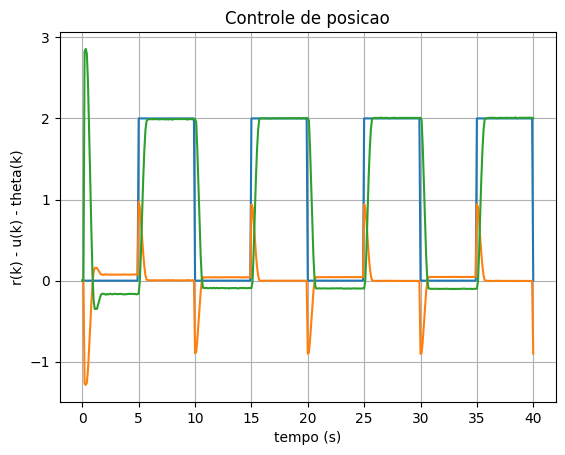

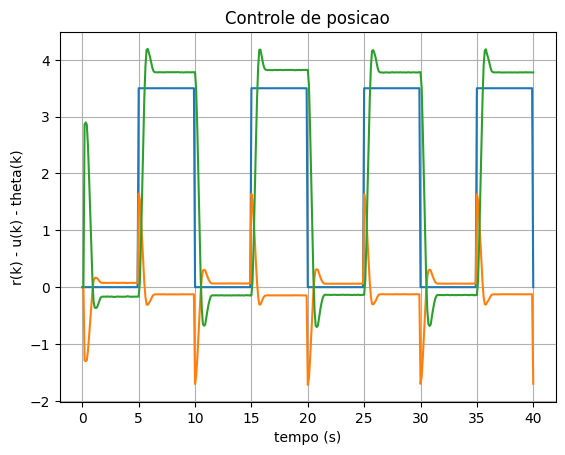

In [7]:
#%matplotlib qt
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as co
from scipy import signal
#
# Leitura do arquivo de dados gerado pelo Script Matlab
#
# coluna 1 = t (tempo em segundos)
# coluna 2 - vetorrk (sinal de referencia em volts)
# coluna 3 - vetoruk (esforco de controle em volts)
# coluna 4 - vetoryk (posicao angular, em volts)
#
for i in range (1,4):
    a = np.loadtxt("pos"+str(i)+".txt", dtype=float)     # <--------- modifique aqui o nome do arquivo
    t = a[:,0];
    r = a[:,1];
    u = a[:,2];
    theta = a[:,3];
    h = t[1]-t[0]; # <--------------------------------intervalo de amostragem
    #
    # Esses objetos provenientes da library numpy
    # possuem posicao de indice 0
    # u[0], w[0] existem
    #
    plt.plot(t,r,t,u,t,theta)
    plt.title('Controle de posicao')
    plt.xlabel('tempo (s)')
    plt.ylabel('r(k) - u(k) - theta(k)')
    plt.grid()
    plt.show()

# 4. Discussões

# 5. Conclusões